# <u><center>Linear Regression

**Linear** means straight, and **Regression** means finding relationship between ind and dep var

    
1. It's a statistical method used for predictive analysis. It's a supervised learning technique
 
    
2. It predicts only continuous/real/numeric values(Eg: Sales,Salary,etc..). Example: Predicting the salary(y) of an employee given the years of exp(x).
 
    
3. It shows linear relationship between dep var(y) and one/more ind var(x1, x2.....), meaning, how y changes with change in x.
 
    
4. Graphically represented by straight line, and mathematically by equation - 
##### <center>target_or_ind_var(y) = intercept(a) + LR_coeff(a1) * ind_var_or_predictor(x1) + random_error(e)
    
    Here, 
    **a1** is the slope/gradient of the line, and can be +ve/-ve/zero. 
    **a** is the intecept, can be +ve/-ve/zero.
         
<img src="linear_reg_straight_line.jpeg" width="300" height="300">

5. <u>**Types of Linear regression**</u>:
    - Simple LR: Only one ind var exist
    - Multiple LR: Two/more ind var exist

    
6. **LR line** shows two type of relationship b/w dep and ind var. If y increases as x increases then **Positive Linear Relationship**, and if y descreases as x increases then **Negative Linear Relationship**.

    
7. The purpose is to find the best fit line, meaning, the error b/w the ind and dep var should be minimized, and the regression line should have least error. To do that, we have weights/co-eff of the line(a and a1). So, we need to find the best co-eff of line by experimenting with diff values. To get the best co-eff, we use **cost function.**

    
8. <u>**Cost funtion**</u>:
    - It optimises the regression co-eff
    - It measures the performance of LR model
    - It is used to find accuracy of the Mapping/Hyothesis function(equation b/w y and x)
    - For LR, we use **Mean square error(MSE)** as cost function.
    - MSE - It's the avg of diff b/w the actual and predicted values.
    
<img src="mse_equation.jpg" width="300" height="300">

9. <u>**Residual**</u>: The diff between the actual and predicted values. If the points are far from regression line then high residual, and vice versa.


10. So here, we have to find out the best co-eff, also means, iterating over diff value of weights to minimize the MSE/Cost function or in other words to reduce the residuals. To do this, we use **Gradient descent method**.


11. <u>**Gradient descent(GD)**</u>: 
     - Main function is to update the co-eff of the line, and minimize the Cost function/MSE/Residuals. 
     - So mathematically, it's a minimization problem, meaning, we have to reach some minimum point of the function, also called convergence. 
     - It starts by randomly selecting the values of weights/co-eff, and iteratively reaching the point where the MSE is least, basically finding the minima of the cost function.
     - In GD algo, the speed of reaching the minima point is dependent on learning rate(alpha), which means, the number of steps you take for each iteration. It means, changing one weight/co-eff of the line, and keeping other constant. And for each iteration, we calculate MSE. It will go on until we find the best value of co-eff.
     - Here we take partial derivatives(also called gradient) of each weights, and keep updating the values as per the learning rate.
     - If we select the optimum value of learning rate, then our GD algo will converge in less no. of iterations. So here learning rate defines the performance of GD algo.


12. **<u>Model performance**</u>:
    - R-squared method: Statistical method used to find the godness of fit.
    - Values raging from 0-100
    - Higher the R-square value, stronger is the relation b/w y and x, better the model.
    - Also called, coefficient of determination.
    - D - Learn more about R-squared

13. <u>**Assumptions**</u>:
    - Linear relationship b/w y and x.
    - Small or no multicollinearity b/w ind var
    - Homogeneity of variance: The error term doesn't change much or is constant as the value of ind var changes.
    - The error terms must be normally distributed.
    - No autocorellation in error terms.

## Implementation of Simple LR

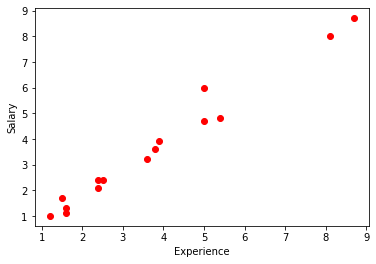

In [49]:
# import some required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define dataset. Salary = y and exp = x
experience = np.array([2.4,5.0,1.5,3.8,8.7,3.6,1.2,8.1,2.5,5,1.6,1.6,2.4,3.9,5.4])
salary = np.array([2.1,4.7,1.7,3.6,8.7,3.2,1.0,8.0,2.4,6,1.1,1.3,2.4,3.9,4.8])
n = np.size(exp)

# Plot the data points
plt.scatter(experience,salary, color = 'red')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

In [50]:
# Initialize the parameters
a0 = 0                  # intercept
a1 = 0                  # Slope
lr = 0.0001             # Learning rate
iterations = 1000       # Number of iterations
error = []              # Error array to calculate cost for each iterations.
for itr in range(iterations):
    error_cost = 0
    cost_a0 = 0
    cost_a1 = 0
    for i in range(len(experience)):
        y_pred = a0+a1*experience[i]   # predict value for given x
        error_cost = error_cost +(salary[i]-y_pred)**2
        for j in range(len(experience)):
            partial_wrt_a0 = -2 *(salary[j] - (a0 + a1*experience[j]))                #partial derivative w.r.t a0
            partial_wrt_a1 = (-2*experience[j])*(salary[j]-(a0 + a1*experience[j]))   #partial derivative w.r.t a1
            cost_a0 = cost_a0 + partial_wrt_a0      #calculate cost for each number and add
            cost_a1 = cost_a1 + partial_wrt_a1      #calculate cost for each number and add
        a0 = a0 - lr * cost_a0    #update a0
        a1 = a1 - lr * cost_a1    #update a1
        #print(itr,a0,a1)          #Check iteration and updated a0 and a1
    error.append(error_cost)      #Append the data in array

Text(0, 0.5, 'Error')

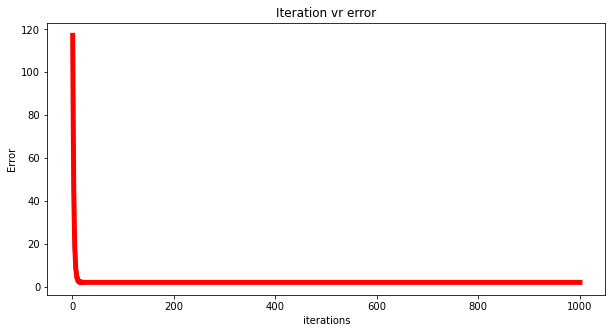

In [51]:
# Plot the error for each iteration
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,len(error)+1),error,color='red',linewidth = 5)
plt.title("Iteration vr error")
plt.xlabel("iterations")
plt.ylabel("Error")

In [52]:
print(a0, a1)

-0.21354150071690242 1.0247464287610857


In [53]:
# Predict the salary by using optimum co-eff/weights of the best fit regression line
pred = a0 + a1*experience
print(pred)

[2.24584993 4.91019064 1.32357814 3.68049493 8.70175243 3.47554564
 1.01615421 8.08690457 2.34832457 4.91019064 1.42605279 1.42605279
 2.24584993 3.78296957 5.32008921]


Text(0, 0.5, 'salary')

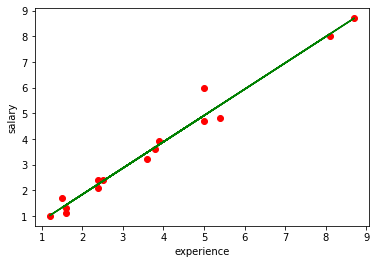

In [54]:
# Plot the regression line.
plt.scatter(experience,salary,color = 'red')
plt.plot(experience,pred, color = 'green')
plt.xlabel("experience")
plt.ylabel("salary")

In [55]:
# Calculate the MSE
error1 = salary - pred
se = np.sum(error1 ** 2)
mse = se/n
print("mean squared error is", mse)

mean squared error is 0.12785817711928918


## Implementation of LR using Sklearn package

In [56]:
# Use the scikit library to confirm the above steps.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

experience = experience.reshape(-1,1)

model = LinearRegression()
model.fit(experience,salary)

salary_pred = model.predict(experience)

Mse = mean_squared_error(salary, salary_pred)

print('slope', model.coef_)
print("Intercept", model.intercept_)
print("MSE", Mse)

slope [1.02474643]
Intercept -0.2135415007169028
MSE 0.1278581771192891
